<a href="https://www.kaggle.com/code/lalit7881/ai-productivity-ml-classification-accuracy-92-45?scriptVersionId=297150246" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-tool-usage-and-workplace-productivity-dataset/ai_productivity_targets.csv
/kaggle/input/ai-tool-usage-and-workplace-productivity-dataset/ai_productivity_features.csv


## Title:

AI Workplace Productivity Dataset

## Description:

The AI Workplace Productivity Dataset provides structured data focused on measuring and analyzing the impact of artificial intelligence tools in professional work environments. This dataset includes information related to employee performance metrics, task completion times, automation usage, collaboration efficiency, decision-making processes, and overall productivity trends before and after AI integration.

It is designed to help researchers, data analysts, and organizations understand how AI-driven technologies influence workflow optimization, operational efficiency, employee engagement, and business outcomes. The dataset can be used for exploratory data analysis, predictive modeling, performance benchmarking, and identifying productivity patterns across different departments, roles, or industries.

By leveraging this dataset, stakeholders can gain insights into how AI adoption transforms workplace dynamics, improves time management, reduces manual effort, and enhances strategic decision-making.

## Import dataset

In [2]:
features_df = pd.read_csv('/kaggle/input/ai-tool-usage-and-workplace-productivity-dataset/ai_productivity_features.csv')
targets_df = pd.read_csv('/kaggle/input/ai-tool-usage-and-workplace-productivity-dataset/ai_productivity_targets.csv')

# Merge them on Employee_ID
df = pd.merge(features_df, targets_df, on='Employee_ID')

print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (4500, 17)


,Employee_ID,job_role,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,deadline_pressure_level,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score,productivity_score,burnout_risk_level
0,3c6ca882-3fa3-446b-8208-c92f3f306f06,Writer,19,11.8,28.5,19.2,1.4,High,1.9,2.3,0.20,2,7.1,4.8,10.00,81.0,High
1,02f168cc-7747-4dbd-a868-ea2cfb41e22a,Designer,4,10.8,24.1,23.3,2.6,Low,8.0,9.8,1.82,3,3.4,5.5,6.78,59.2,Medium
2,d39ce8c9-6e2a-4f86-b888-e2b5f4a18cf7,Developer,6,25.9,69.4,10.0,1.4,Medium,6.8,8.9,5.52,5,4.6,3.8,9.66,62.4,High
3,14511660-d78a-453f-9449-f17cd239ec27,Manager,20,7.9,17.2,25.1,0.2,High,3.5,8.6,1.14,5,5.6,3.9,10.00,76.8,High
4,0597f0bb-ed5a-4e35-94ac-3f0f6a5c2bc2,Developer,15,8.6,20.6,20.1,1.4,Low,5.9,5.3,2.75,10,1.0,7.4,5.38,53.7,Medium


In [3]:
# Check dataset info
df.info()

# Check data types
df.dtypes

# Summary statistics
df.describe()

# Check for duplicate rows
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee_ID                   4500 non-null   object 
 1   job_role                      4500 non-null   object 
 2   experience_years              4500 non-null   int64  
 3   ai_tool_usage_hours_per_week  4500 non-null   float64
 4   tasks_automated_percent       4500 non-null   float64
 5   manual_work_hours_per_week    4500 non-null   float64
 6   learning_time_hours_per_week  4500 non-null   float64
 7   deadline_pressure_level       4500 non-null   object 
 8   meeting_hours_per_week        4500 non-null   float64
 9   collaboration_hours_per_week  4500 non-null   float64
 10  error_rate_percent            4500 non-null   float64
 11  task_complexity_score         4500 non-null   int64  
 12  focus_hours_per_day           4500 non-null   float64
 13  wor

np.int64(0)

In [4]:
# Check missing values
df.isnull().sum()

# Percentage of missing values
(df.isnull().sum() / len(df)) * 100

# Drop rows with too many missing values (if needed)
df.dropna(thresh=int(0.7 * len(df.columns)), inplace=True)

# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [5]:
df.drop_duplicates(inplace=True)


In [6]:
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [7]:
# Detect outliers using IQR method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
            (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

print(outliers)


experience_years                  0
ai_tool_usage_hours_per_week     14
tasks_automated_percent          19
manual_work_hours_per_week        9
learning_time_hours_per_week    135
meeting_hours_per_week          303
collaboration_hours_per_week     94
error_rate_percent                0
task_complexity_score             0
focus_hours_per_day              79
work_life_balance_score           0
burnout_risk_score                0
productivity_score               10
dtype: int64


In [8]:
corr = df.corr(numeric_only=True)

## Data visualizations

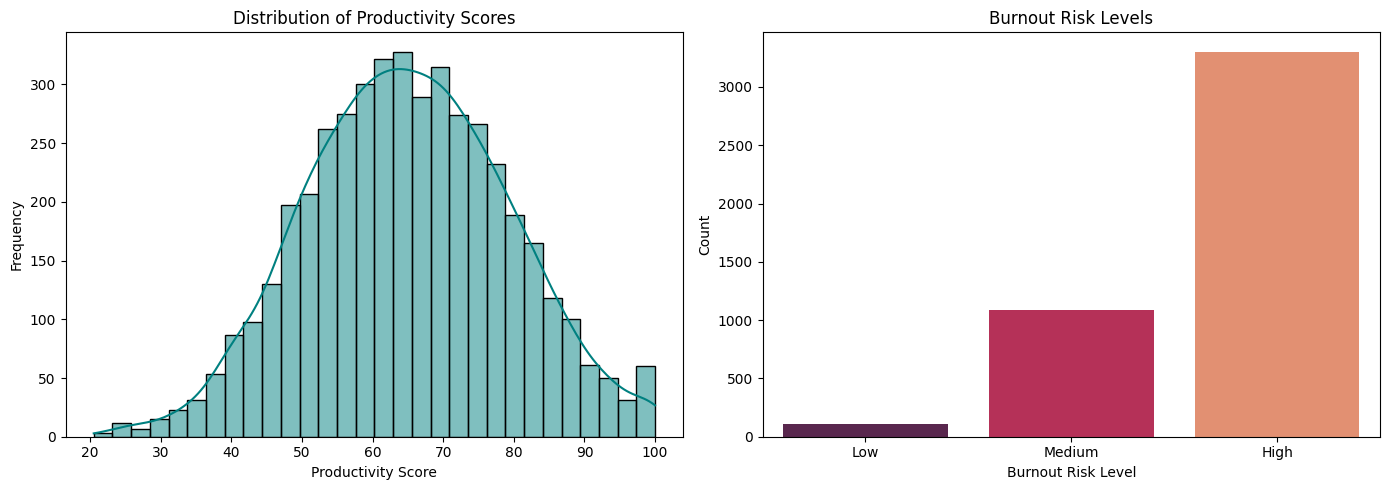

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Productivity Histogram
sns.histplot(
    df['productivity_score'],
    bins=30,
    kde=True,
    ax=axes[0],
    color='teal'
)
axes[0].set_title('Distribution of Productivity Scores', fontsize=12)
axes[0].set_xlabel('Productivity Score')
axes[0].set_ylabel('Frequency')

# Burnout Countplot
sns.countplot(
    x='burnout_risk_level',
    data=df,
    ax=axes[1],
    palette='rocket',
    order=['Low', 'Medium', 'High']
)
axes[1].set_title('Burnout Risk Levels', fontsize=12)
axes[1].set_xlabel('Burnout Risk Level')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


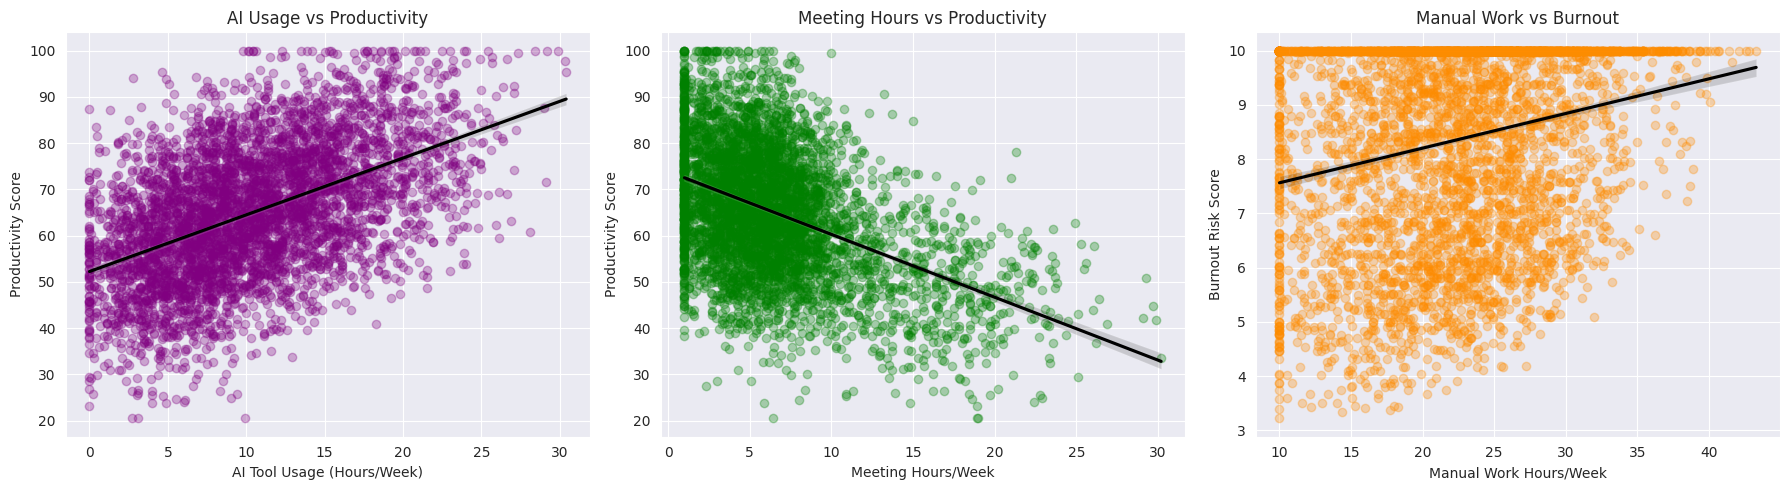

In [10]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# AI Usage vs Productivity
sns.regplot(
    x='ai_tool_usage_hours_per_week',
    y='productivity_score',
    data=df,
    ax=axes[0],
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'black'},
    color='purple'
)
axes[0].set_title('AI Usage vs Productivity', fontsize=12)
axes[0].set_xlabel('AI Tool Usage (Hours/Week)')
axes[0].set_ylabel('Productivity Score')

# Meeting Hours vs Productivity
sns.regplot(
    x='meeting_hours_per_week',
    y='productivity_score',
    data=df,
    ax=axes[1],
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'black'},
    color='green'
)
axes[1].set_title('Meeting Hours vs Productivity', fontsize=12)
axes[1].set_xlabel('Meeting Hours/Week')
axes[1].set_ylabel('Productivity Score')

# Manual Work vs Burnout Score
sns.regplot(
    x='manual_work_hours_per_week',
    y='burnout_risk_score',
    data=df,
    ax=axes[2],
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'black'},
    color='darkorange'
)
axes[2].set_title('Manual Work vs Burnout', fontsize=12)
axes[2].set_xlabel('Manual Work Hours/Week')
axes[2].set_ylabel('Burnout Risk Score')

plt.tight_layout()
plt.show()

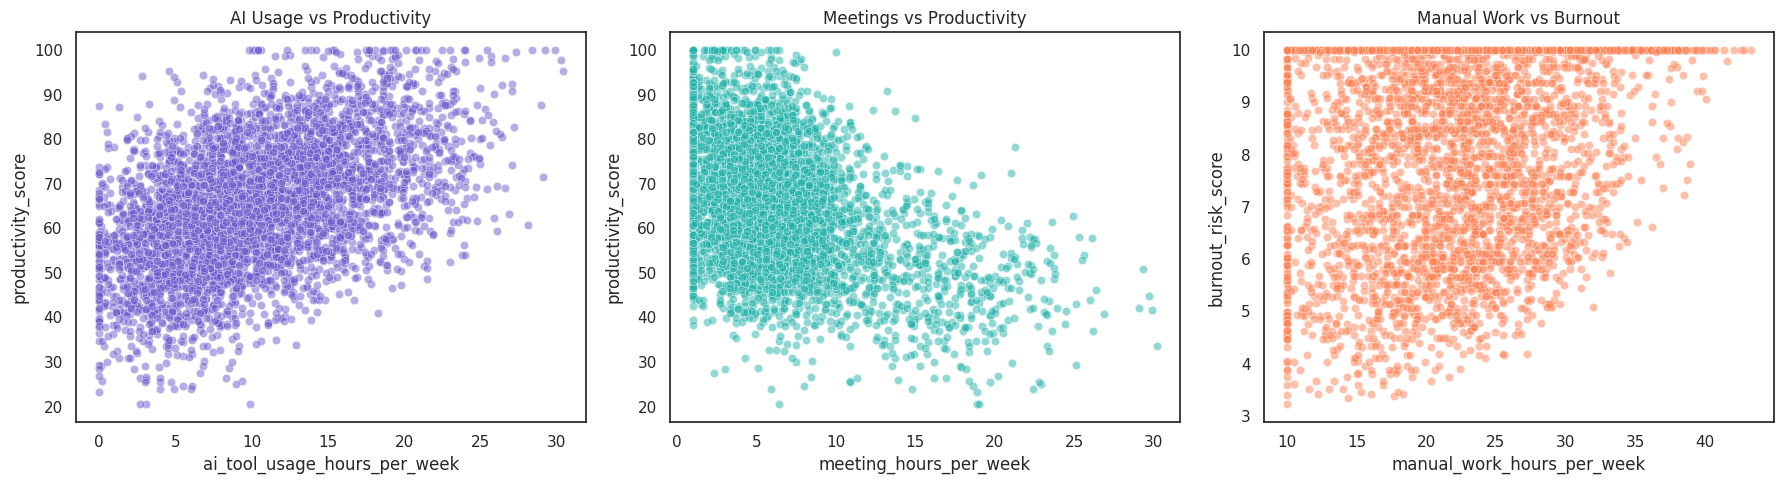

In [11]:
sns.set_theme(style="white")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(
    x='ai_tool_usage_hours_per_week',
    y='productivity_score',
    data=df,
    ax=axes[0],
    alpha=0.5,
    color='#6A5ACD'
)

sns.scatterplot(
    x='meeting_hours_per_week',
    y='productivity_score',
    data=df,
    ax=axes[1],
    alpha=0.5,
    color='#20B2AA'
)

sns.scatterplot(
    x='manual_work_hours_per_week',
    y='burnout_risk_score',
    data=df,
    ax=axes[2],
    alpha=0.5,
    color='#FF7F50'
)

axes[0].set_title('AI Usage vs Productivity')
axes[1].set_title('Meetings vs Productivity')
axes[2].set_title('Manual Work vs Burnout')

plt.tight_layout()
plt.show()


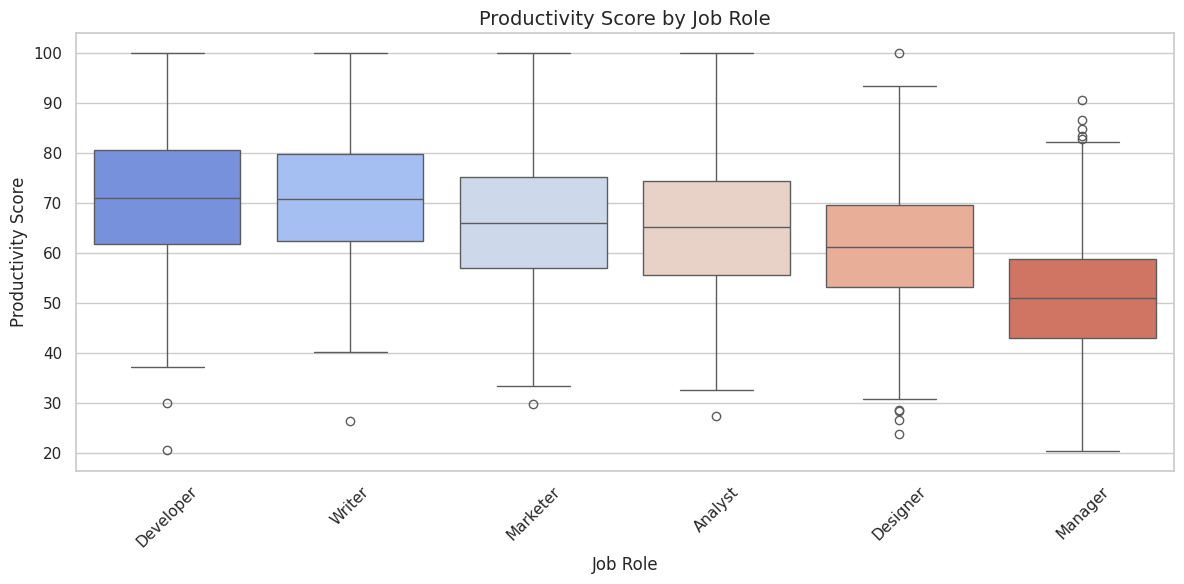

In [12]:
sns.set_theme(style="whitegrid")

# Order job roles by median productivity
order = df.groupby('job_role')['productivity_score'] \
          .median() \
          .sort_values(ascending=False) \
          .index

plt.figure(figsize=(12, 6))

sns.boxplot(
    x='job_role',
    y='productivity_score',
    data=df,
    order=order,
    palette='coolwarm'
)

plt.title('Productivity Score by Job Role', fontsize=14)
plt.xlabel('Job Role')
plt.ylabel('Productivity Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

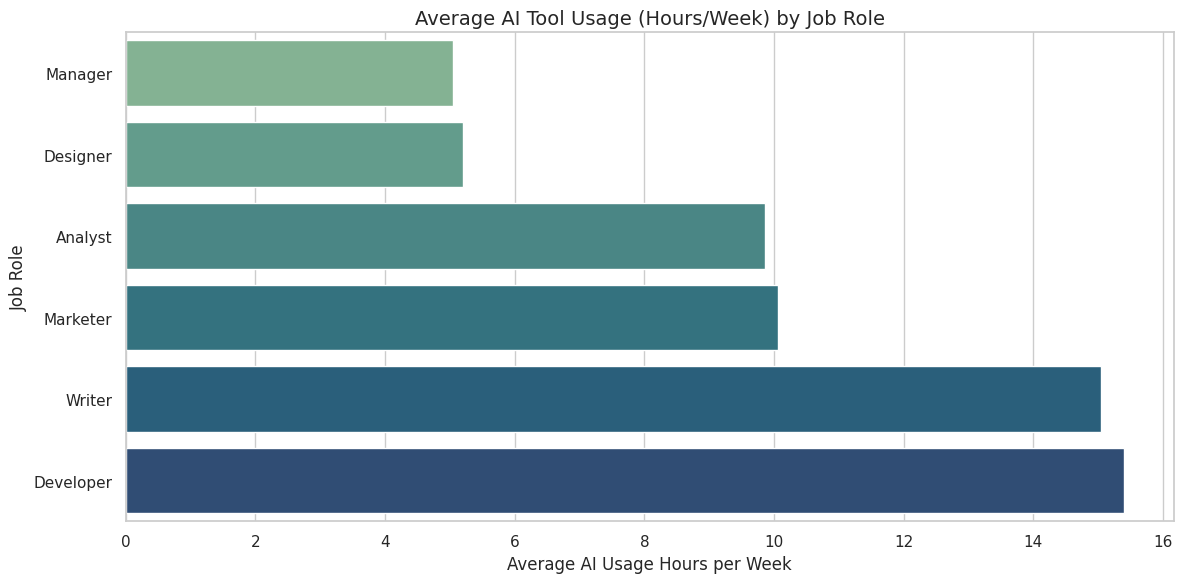

In [13]:
order = df.groupby('job_role')['ai_tool_usage_hours_per_week'] \
          .mean() \
          .sort_values() \
          .index

plt.figure(figsize=(12, 6))

sns.barplot(
    y='job_role',
    x='ai_tool_usage_hours_per_week',
    data=df,
    order=order,
    palette='crest',
    ci=None
)

plt.title('Average AI Tool Usage (Hours/Week) by Job Role', fontsize=14)
plt.xlabel('Average AI Usage Hours per Week')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()

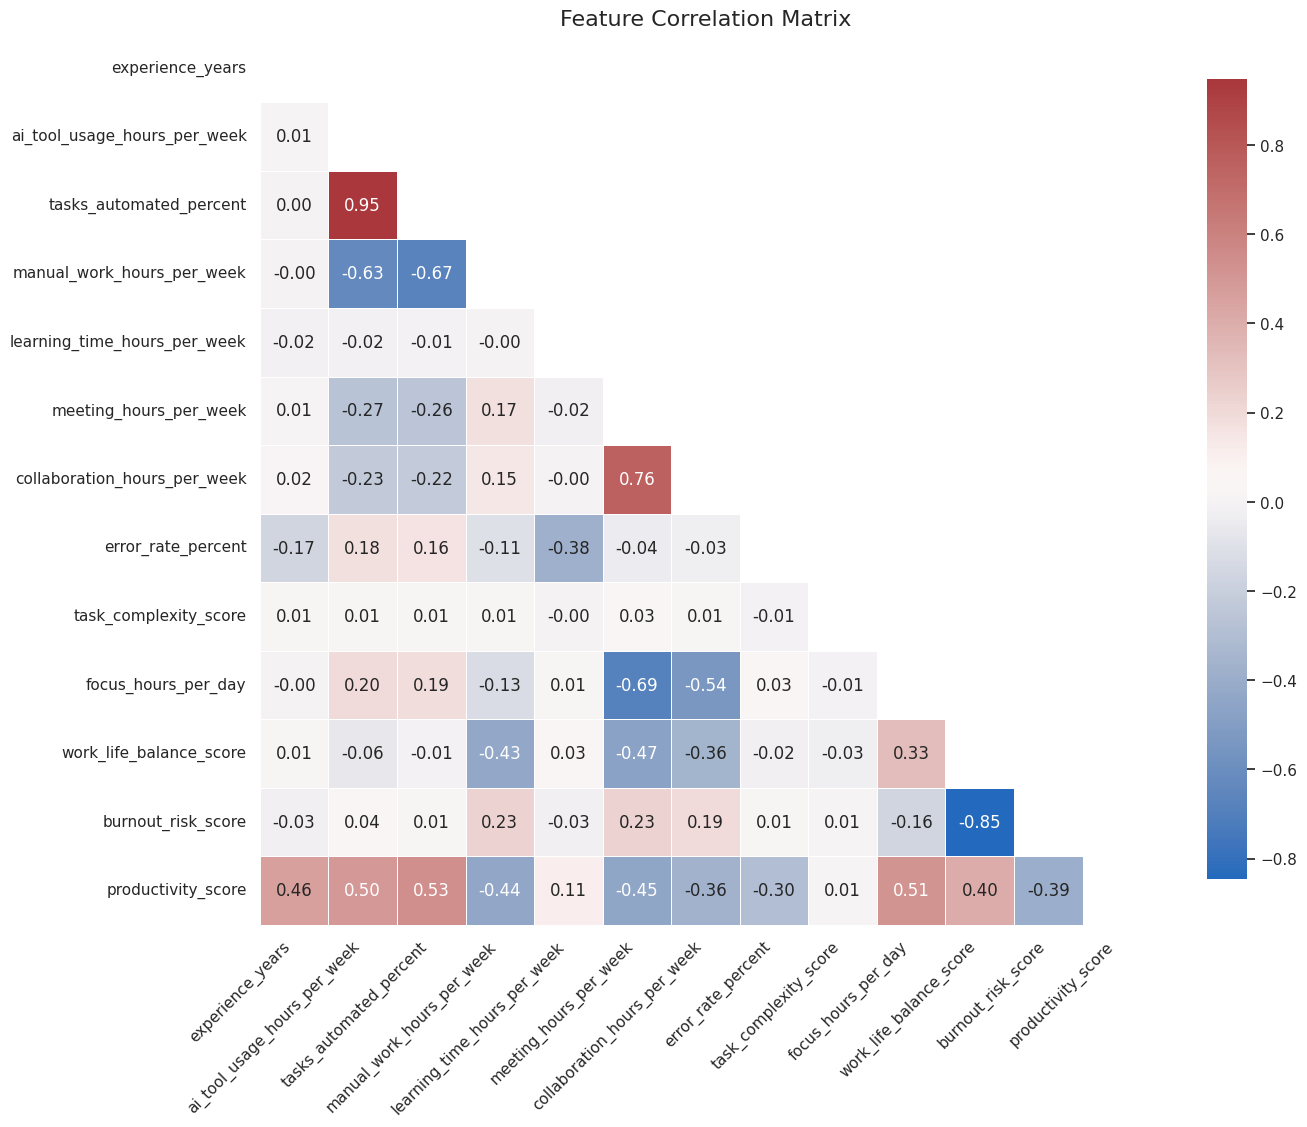

In [14]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Create triangular mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.set_theme(style="white")

plt.figure(figsize=(14, 12))

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="vlag",          # Different modern color map
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .8}
)

plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
print("\n" + "="*50)
print("🔍 DUPLICATE CHECK")
print("="*50)
print(f"Duplicate rows: {df.duplicated().sum()}")

print("\n" + "="*50)
print("💾 MEMORY USAGE")
print("="*50)
print(f"{df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")



🔍 DUPLICATE CHECK
Duplicate rows: 0

💾 MEMORY USAGE
0.96 MB


In [16]:
# Small constant to avoid division by zero
EPS = 1e-6

# Ensure numeric columns are actually numeric
numeric_cols = [
    "manual_work_hours_per_week",
    "ai_tool_usage_hours_per_week",
    "meeting_hours_per_week",
    "tasks_automated_percent",
    "collaboration_hours_per_week",
    "focus_hours_per_day",
    "burnout_risk_score",
    "experience_years",
    "task_complexity_score",
    "learning_time_hours_per_week",
    "error_rate_percent"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# -------------------------------
# Feature Engineering
# -------------------------------

df["total_work_hours"] = (
    df["manual_work_hours_per_week"] +
    df["ai_tool_usage_hours_per_week"] +
    df["meeting_hours_per_week"]
)

df["ai_to_manual_ratio"] = (
    df["ai_tool_usage_hours_per_week"] /
    (df["manual_work_hours_per_week"] + EPS)
)

df["automation_efficiency"] = (
    df["tasks_automated_percent"] /
    (df["ai_tool_usage_hours_per_week"] + EPS)
)

df["collaboration_meeting_ratio"] = (
    df["collaboration_hours_per_week"] /
    (df["meeting_hours_per_week"] + EPS)
)

df["focus_to_total_ratio"] = (
    (df["focus_hours_per_day"] * 5) /
    (df["total_work_hours"] + EPS)
)

# Encode deadline pressure safely
pressure_map = {"Low": 1, "Medium": 2, "High": 3}

df["deadline_pressure_encoded"] = pd.to_numeric(
    df["deadline_pressure_level"].map(pressure_map),
    errors="coerce"
)

df["stress_indicator"] = (
    df["deadline_pressure_encoded"] *
    df["burnout_risk_score"]
)

df["experience_complexity_interaction"] = (
    df["experience_years"] *
    df["task_complexity_score"]
)

df["workload_intensity"] = (
    df["manual_work_hours_per_week"] *
    df["task_complexity_score"]
)

df["learning_to_work_ratio"] = (
    df["learning_time_hours_per_week"] /
    (df["total_work_hours"] + EPS)
)

df["error_complexity_product"] = (
    df["error_rate_percent"] *
    df["task_complexity_score"]
)

engineered_features = [
    "total_work_hours",
    "ai_to_manual_ratio",
    "automation_efficiency",
    "collaboration_meeting_ratio",
    "focus_to_total_ratio",
    "stress_indicator",
    "experience_complexity_interaction",
    "workload_intensity",
    "learning_to_work_ratio",
    "error_complexity_product"
]

print(f"✅ Created {len(engineered_features)} engineered features:")
print(engineered_features)

✅ Created 10 engineered features:
['total_work_hours', 'ai_to_manual_ratio', 'automation_efficiency', 'collaboration_meeting_ratio', 'focus_to_total_ratio', 'stress_indicator', 'experience_complexity_interaction', 'workload_intensity', 'learning_to_work_ratio', 'error_complexity_product']


In [17]:
from sklearn.preprocessing import LabelEncoder

# Make sure no missing values exist before encoding
categorical_cols = ["deadline_pressure_level", "job_role", "burnout_risk_level"]

for col in categorical_cols:
    df[col] = df[col].astype(str)  # ensure string type
    df[col] = df[col].fillna("Unknown")
le_pressure = LabelEncoder()
df["deadline_pressure_encoded"] = le_pressure.fit_transform(df["deadline_pressure_level"])

print("Deadline Pressure Mapping:")
print(dict(zip(le_pressure.classes_, le_pressure.transform(le_pressure.classes_))))
le_role = LabelEncoder()
df["job_role_encoded"] = le_role.fit_transform(df["job_role"])

print("\nJob Role Mapping:")
print(dict(zip(le_role.classes_, le_role.transform(le_role.classes_))))

le_burnout = LabelEncoder()
df["burnout_risk_level_encoded"] = le_burnout.fit_transform(df["burnout_risk_level"])

print("\nBurnout Risk Level Mapping:")
print(dict(zip(le_burnout.classes_, le_burnout.transform(le_burnout.classes_))))


Deadline Pressure Mapping:
{'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}

Job Role Mapping:
{'Analyst': np.int64(0), 'Designer': np.int64(1), 'Developer': np.int64(2), 'Manager': np.int64(3), 'Marketer': np.int64(4), 'Writer': np.int64(5)}

Burnout Risk Level Mapping:
{'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}


In [18]:
feature_cols = [
    "experience_years",
    "ai_tool_usage_hours_per_week",
    "tasks_automated_percent",
    "manual_work_hours_per_week",
    "learning_time_hours_per_week",
    "meeting_hours_per_week",
    "collaboration_hours_per_week",
    "error_rate_percent",
    "task_complexity_score",
    "focus_hours_per_day",
    "work_life_balance_score",
    "burnout_risk_score",
    "deadline_pressure_encoded",
    "job_role_encoded",
    "total_work_hours",
    "ai_to_manual_ratio",
    "automation_efficiency",
    "collaboration_meeting_ratio",
    "focus_to_total_ratio",
    "stress_indicator",
    "experience_complexity_interaction",
    "workload_intensity",
    "learning_to_work_ratio",
    "error_complexity_product"
]

In [19]:
X = df[feature_cols].copy()

# Ensure numeric
X = X.apply(pd.to_numeric, errors="coerce")

# -------------------------------
# Targets
# -------------------------------
y_reg = pd.to_numeric(df["productivity_score"], errors="coerce")
y_clf = df["burnout_risk_level_encoded"]

# -------------------------------
# Basic Shape Check
# -------------------------------
print("="*50)
print("📊 DATA SHAPES")
print("="*50)
print(f"Feature matrix shape        : {X.shape}")
print(f"Regression target shape     : {y_reg.shape}")
print(f"Classification target shape : {y_clf.shape}")

# -------------------------------
# Missing Value Check
# -------------------------------
print("\n❗ Missing values in features:")
print(X.isnull().sum().sum())

print("\n❗ Missing values in regression target:")
print(y_reg.isnull().sum())

print("\n❗ Missing values in classification target:")
print(y_clf.isnull().sum())

# -------------------------------
# Classification Distribution
# -------------------------------
print("\n📊 Burnout Class Distribution:")
print(df["burnout_risk_level"].value_counts())
print("\nPercentage Distribution:")
print(df["burnout_risk_level"].value_counts(normalize=True) * 100)

📊 DATA SHAPES
Feature matrix shape        : (4500, 24)
Regression target shape     : (4500,)
Classification target shape : (4500,)

❗ Missing values in features:
0

❗ Missing values in regression target:
0

❗ Missing values in classification target:
0

📊 Burnout Class Distribution:
burnout_risk_level
High      3303
Medium    1087
Low        110
Name: count, dtype: int64

Percentage Distribution:
burnout_risk_level
High      73.400000
Medium    24.155556
Low        2.444444
Name: proportion, dtype: float64


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X,
    y_reg,
    y_clf,
    test_size=0.2,
    random_state=42,
    stratify=y_clf
)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)


Training shape: (3600, 24)
Test shape: (900, 24)


In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame (preserve column names & index)
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)

print("="*50)
print("📊 DATA SPLIT SUMMARY")
print("="*50)
print(f"Train size: {X_train.shape[0]}")
print(f"Test size : {X_test.shape[0]}")
print(f"Feature count: {X_train.shape[1]}")


📊 DATA SPLIT SUMMARY
Train size: 3600
Test size : 900
Feature count: 24


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize model
lr = LinearRegression()

# Train
lr.fit(X_train_scaled, y_reg_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)

# Metrics
rmse_lr = np.sqrt(mean_squared_error(y_reg_test, y_pred_lr))
mae_lr = mean_absolute_error(y_reg_test, y_pred_lr)
r2_lr = r2_score(y_reg_test, y_pred_lr)

print("="*50)
print("📈 Linear Regression Performance")
print("="*50)
print(f"RMSE : {rmse_lr:.4f}")
print(f"MAE  : {mae_lr:.4f}")
print(f"R²   : {r2_lr:.4f}")

📈 Linear Regression Performance
RMSE : 5.0719
MAE  : 4.0634
R²   : 0.8736


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize model
rf_reg = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Train
rf_reg.fit(X_train, y_reg_train)

# Predict
y_pred_rf = rf_reg.predict(X_test)

# Metrics
rmse_rf = np.sqrt(mean_squared_error(y_reg_test, y_pred_rf))
mae_rf = mean_absolute_error(y_reg_test, y_pred_rf)
r2_rf = r2_score(y_reg_test, y_pred_rf)

print("="*50)
print("🌳 Random Forest Regressor Performance")
print("="*50)
print(f"RMSE : {rmse_rf:.4f}")
print(f"MAE  : {mae_rf:.4f}")
print(f"R²   : {r2_rf:.4f}")

🌳 Random Forest Regressor Performance
RMSE : 5.8536
MAE  : 4.6701
R²   : 0.8317


In [24]:
from sklearn.model_selection import cross_val_score
cv_scores_rf = cross_val_score(
    rf_reg,
    X,
    y_reg,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

print("="*50)
print("🌳 Random Forest - 5 Fold Cross Validation")
print("="*50)
print(f"Fold R2 Scores : {np.round(cv_scores_rf, 4)}")
print(f"Mean R2        : {cv_scores_rf.mean():.4f}")
print(f"Std Deviation  : {cv_scores_rf.std():.4f}")


🌳 Random Forest - 5 Fold Cross Validation
Fold R2 Scores : [0.8468 0.8343 0.8412 0.8371 0.8318]
Mean R2        : 0.8382
Std Deviation  : 0.0053


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

gb_reg = GradientBoostingRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)

gb_reg.fit(X_train, y_reg_train)

y_pred_gb = gb_reg.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_reg_test, y_pred_gb))
mae_gb = mean_absolute_error(y_reg_test, y_pred_gb)
r2_gb = r2_score(y_reg_test, y_pred_gb)

print("--- Gradient Boosting Regressor ---")
print(f"RMSE: {rmse_gb:.4f}")
print(f"MAE: {mae_gb:.4f}")
print(f"R2: {r2_gb:.4f}")


--- Gradient Boosting Regressor ---
RMSE: 5.6938
MAE: 4.5710
R2: 0.8408


In [26]:
cv_scores_gb = cross_val_score(
    gb_reg,
    X,
    y_reg,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

print(f"5-Fold CV R2: {cv_scores_gb.mean():.4f} (+/- {cv_scores_gb.std():.4f})")


5-Fold CV R2: 0.8527 (+/- 0.0034)


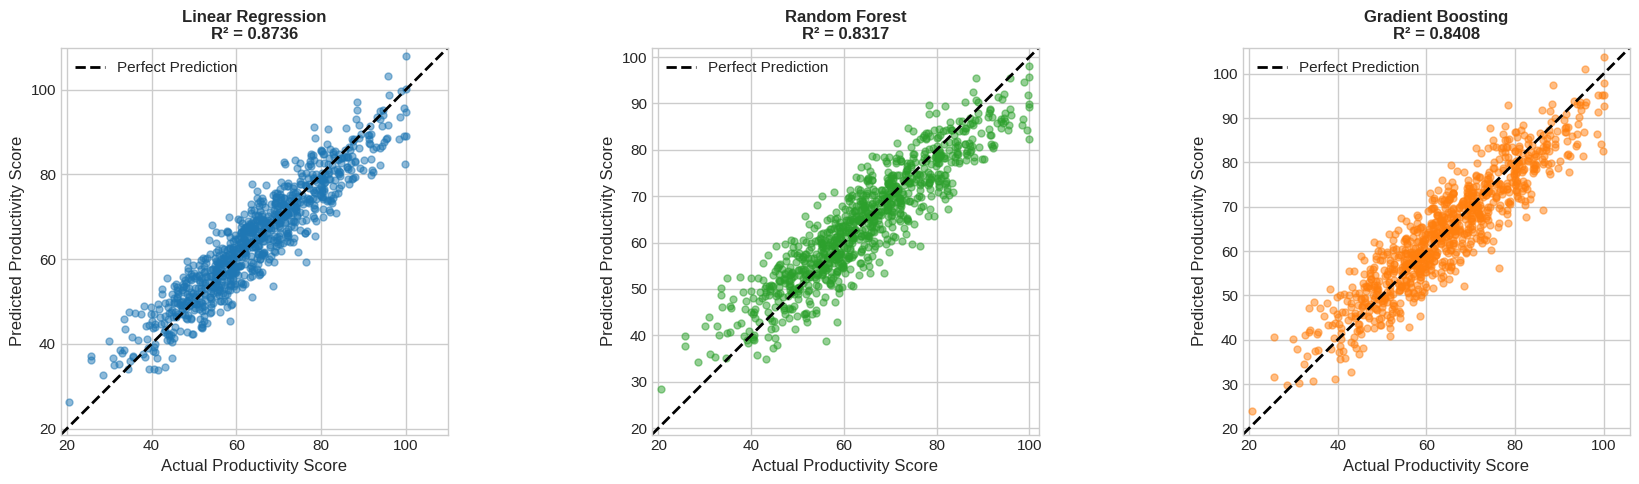

In [27]:
plt.style.use("seaborn-v0_8-whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_reg = [
    ("Linear Regression", y_pred_lr, r2_lr, "#1f77b4"),     # Blue
    ("Random Forest", y_pred_rf, r2_rf, "#2ca02c"),         # Green
    ("Gradient Boosting", y_pred_gb, r2_gb, "#ff7f0e")      # Orange
]

for ax, (name, preds, r2, color) in zip(axes, models_reg):
    
    ax.scatter(
        y_reg_test,
        preds,
        alpha=0.5,
        s=25,
        color=color
    )

    lims = [
        min(y_reg_test.min(), preds.min()) - 2,
        max(y_reg_test.max(), preds.max()) + 2
    ]
    
    ax.plot(
        lims,
        lims,
        linestyle="--",
        linewidth=2,
        color="black",
        label="Perfect Prediction"
    )

    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_xlabel("Actual Productivity Score")
    ax.set_ylabel("Predicted Productivity Score")
    ax.set_title(f"{name}\nR² = {r2:.4f}", fontweight="bold")
    ax.legend()
    ax.set_aspect("equal")

plt.tight_layout()
plt.show()


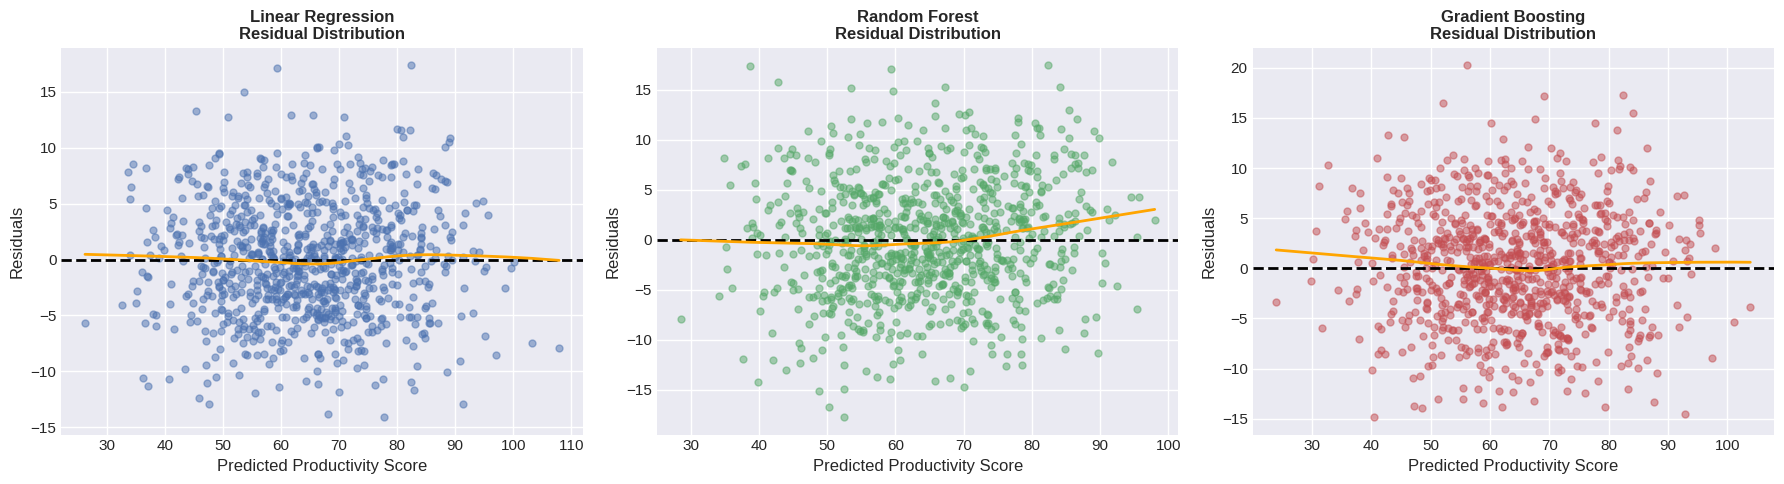

In [28]:
plt.style.use("seaborn-v0_8-darkgrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_reg = [
    ("Linear Regression", y_pred_lr, "#4C72B0"),     # Blue
    ("Random Forest", y_pred_rf, "#55A868"),         # Green
    ("Gradient Boosting", y_pred_gb, "#C44E52")      # Red
]

for ax, (name, preds, color) in zip(axes, models_reg):
    
    residuals = y_reg_test.values - preds
    
    # Scatter
    ax.scatter(
        preds,
        residuals,
        alpha=0.5,
        s=25,
        color=color
    )
    
    # Zero reference line
    ax.axhline(
        y=0,
        linestyle="--",
        linewidth=2,
        color="black"
    )
    
    # Add smooth trend line
    sns.regplot(
        x=preds,
        y=residuals,
        scatter=False,
        lowess=True,
        ax=ax,
        color="orange",
        line_kws={"linewidth": 2}
    )
    
    ax.set_xlabel("Predicted Productivity Score")
    ax.set_ylabel("Residuals")
    ax.set_title(f"{name}\nResidual Distribution", fontweight="bold")

plt.tight_layout()
plt.show()


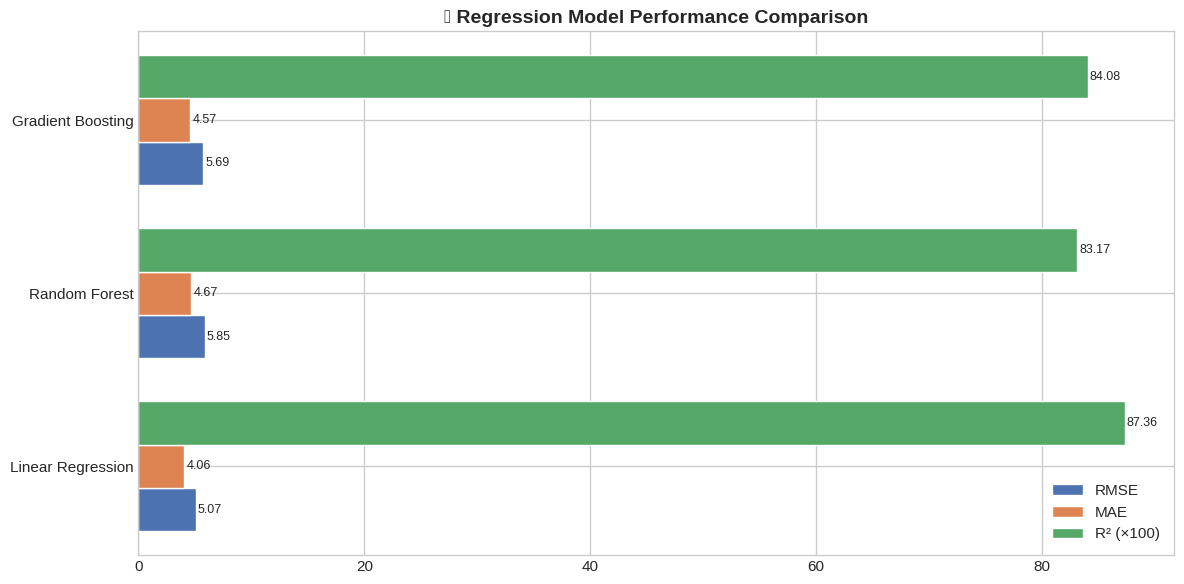

In [29]:
plt.style.use("seaborn-v0_8-whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))

model_names = ["Linear Regression", "Random Forest", "Gradient Boosting"]

rmse_vals = np.array([rmse_lr, rmse_rf, rmse_gb])
mae_vals = np.array([mae_lr, mae_rf, mae_gb])
r2_vals = np.array([r2_lr, r2_rf, r2_gb])

y_pos = np.arange(len(model_names))
height = 0.25

# Bars
bars1 = ax.barh(y_pos - height, rmse_vals, height,
                label="RMSE", color="#4C72B0")

bars2 = ax.barh(y_pos, mae_vals, height,
                label="MAE", color="#DD8452")

bars3 = ax.barh(y_pos + height, r2_vals * 100, height,
                label="R² (×100)", color="#55A868")

ax.set_yticks(y_pos)
ax.set_yticklabels(model_names)
ax.set_title("📊 Regression Model Performance Comparison", fontsize=14, fontweight="bold")
ax.legend()

# Value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.2,
                bar.get_y() + bar.get_height()/2,
                f"{width:.2f}",
                va="center",
                fontsize=9)

plt.tight_layout()
plt.show()


In [30]:
model_scores = {
    "Linear Regression": r2_lr,
    "Random Forest": r2_rf,
    "Gradient Boosting": r2_gb
}

# Get best model name
best_reg_name = max(model_scores, key=model_scores.get)

# Map name to actual model object
model_objects = {
    "Linear Regression": lr,
    "Random Forest": rf_reg,
    "Gradient Boosting": gb_reg
}

best_reg_model = model_objects[best_reg_name]

print(f"Best regression model: {best_reg_name}")
print(f"Best R² Score: {model_scores[best_reg_name]:.4f}")

Best regression model: Linear Regression
Best R² Score: 0.8736


In [31]:
# Check if model has feature_importances_
if hasattr(best_reg_model, "feature_importances_"):
    
    feat_imp_reg = pd.Series(
        best_reg_model.feature_importances_,
        index=feature_cols
    ).sort_values(ascending=True)

    print("🔥 Top 10 Features for Productivity Prediction:\n")
    print(feat_imp_reg.tail(10).iloc[::-1].to_string())

    # Plot only top 15 for better readability
    top_feats = feat_imp_reg.tail(15)

    plt.style.use("seaborn-v0_8-whitegrid")
    fig, ax = plt.subplots(figsize=(10, 8))

    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_feats)))

    top_feats.plot(
        kind="barh",
        ax=ax,
        color=colors,
        edgecolor="black"
    )

    ax.set_title(
        f"📊 Feature Importance - {best_reg_name}",
        fontsize=14,
        fontweight="bold"
    )
    ax.set_xlabel("Importance Score")
    ax.set_ylabel("Features")

    plt.tight_layout()
    plt.show()

else:
    print(f"{best_reg_name} does not support feature_importances_.")


Linear Regression does not support feature_importances_.


In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# =========================
# 2️⃣ Encode Target Properly
# =========================
le_burnout = LabelEncoder()
df["burnout_risk_level_encoded"] = le_burnout.fit_transform(df["burnout_risk_level"])


X = df[feature_cols].copy()
y = df["burnout_risk_level_encoded"].copy()


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)


y_pred = log_reg.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("🔹 Logistic Regression Results")
print("-" * 40)
print(f"Accuracy    : {acc:.4f}")
print(f"Weighted F1 : {f1:.4f}")
print("\nClassification Report:\n")

print(classification_report(
    y_test,
    y_pred,
    target_names=le_burnout.classes_
))

🔹 Logistic Regression Results
----------------------------------------
Accuracy    : 0.9944
Weighted F1 : 0.9944

Classification Report:

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       661
         Low       0.95      0.95      0.95        22
      Medium       0.99      0.99      0.99       217

    accuracy                           0.99       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.99      0.99      0.99       900



In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X_train, y_clf_train)

y_pred_rf_clf = rf_clf.predict(X_test)

acc_rf_clf = accuracy_score(y_clf_test, y_pred_rf_clf)
f1_rf_clf = f1_score(y_clf_test, y_pred_rf_clf, average="weighted")

print("🌲 Random Forest Classifier Results")
print("-" * 45)
print(f"Accuracy      : {acc_rf_clf:.4f}")
print(f"Weighted F1   : {f1_rf_clf:.4f}")
print("\nClassification Report:\n")

print(classification_report(
    y_clf_test,
    y_pred_rf_clf,
    target_names=le_burnout.classes_   # use correct encoder variable
))

🌲 Random Forest Classifier Results
---------------------------------------------
Accuracy      : 1.0000
Weighted F1   : 1.0000

Classification Report:

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       661
         Low       1.00      1.00      1.00        22
      Medium       1.00      1.00      1.00       217

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [34]:
from sklearn.model_selection import cross_val_score

cv_scores_rf_clf = cross_val_score(
    rf_clf,
    X,
    y_clf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

print("🌲 Random Forest Classifier - 5 Fold CV Results")
print("-" * 50)
print(f"Mean Accuracy : {cv_scores_rf_clf.mean():.4f}")
print(f"Std Deviation : {cv_scores_rf_clf.std():.4f}")


🌲 Random Forest Classifier - 5 Fold CV Results
--------------------------------------------------
Mean Accuracy : 1.0000
Std Deviation : 0.0000


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

gb_clf = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)

gb_clf.fit(X_train, y_clf_train)

y_pred_gb_clf = gb_clf.predict(X_test)

acc_gb_clf = accuracy_score(y_clf_test, y_pred_gb_clf)
f1_gb_clf = f1_score(y_clf_test, y_pred_gb_clf, average="weighted")

print("🚀 Gradient Boosting Classifier Results")
print("-" * 50)
print(f"Accuracy      : {acc_gb_clf:.4f}")
print(f"Weighted F1   : {f1_gb_clf:.4f}")
print("\nClassification Report:\n")

print(classification_report(
    y_clf_test,
    y_pred_gb_clf,
    target_names=le_burnout.classes_   # use correct encoder variable
))


🚀 Gradient Boosting Classifier Results
--------------------------------------------------
Accuracy      : 1.0000
Weighted F1   : 1.0000

Classification Report:

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       661
         Low       1.00      1.00      1.00        22
      Medium       1.00      1.00      1.00       217

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [36]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_clf_train)
y_pred_log = log_reg.predict(X_test_scaled)
acc_log = accuracy_score(y_clf_test, y_pred_log)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_clf_train)
y_pred_rf_clf = rf_clf.predict(X_test)
acc_rf_clf = accuracy_score(y_clf_test, y_pred_rf_clf)

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)
gb_clf.fit(X_train, y_clf_train)
y_pred_gb_clf = gb_clf.predict(X_test)
acc_gb_clf = accuracy_score(y_clf_test, y_pred_gb_clf)


In [37]:
from sklearn.preprocessing import LabelEncoder

le_burnout = LabelEncoder()
df["burnout_risk_level_encoded"] = le_burnout.fit_transform(df["burnout_risk_level"])


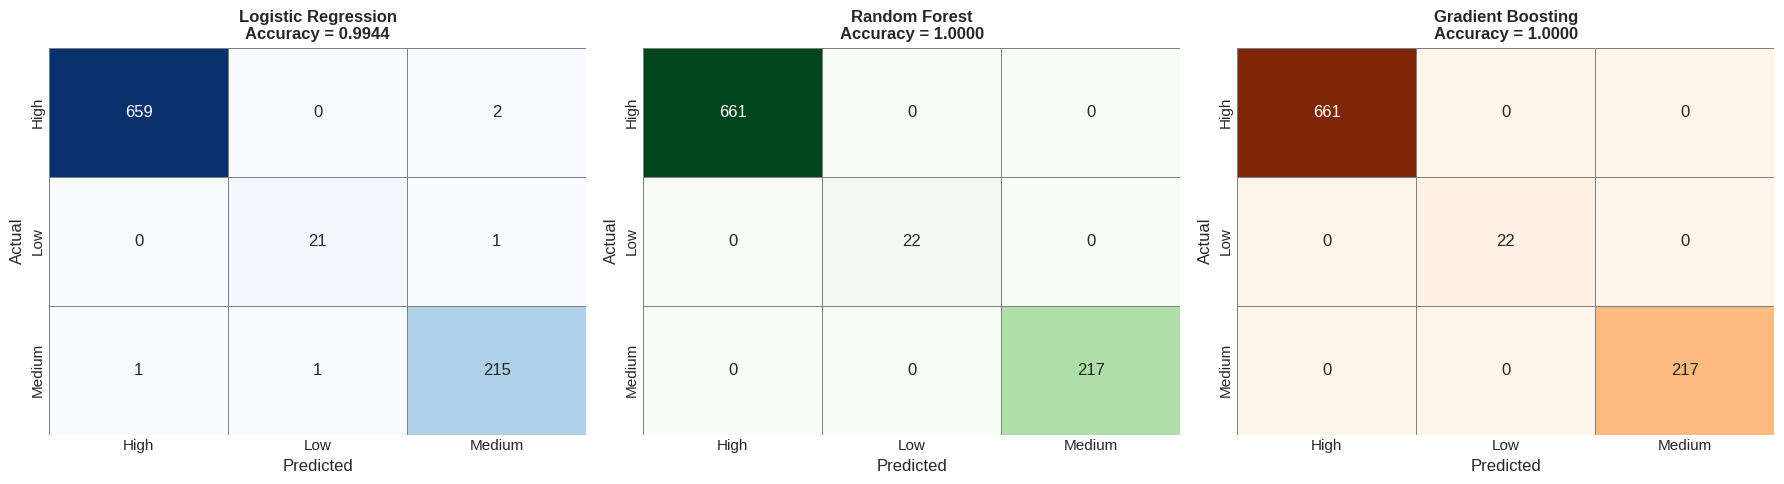

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

classes = le_burnout.classes_

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
clf_models = [
    ("Logistic Regression", y_pred_log, acc_log, "Blues"),
    ("Random Forest", y_pred_rf_clf, acc_rf_clf, "Greens"),
    ("Gradient Boosting", y_pred_gb_clf, acc_gb_clf, "Oranges")
]

for ax, (name, preds, acc, cmap) in zip(axes, clf_models):
    cm = confusion_matrix(y_clf_test, preds)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap=cmap,
        ax=ax,
        xticklabels=classes,
        yticklabels=classes,
        cbar=False,
        linewidths=0.5,
        linecolor="gray"
    )
    ax.set_title(f"{name}\nAccuracy = {acc:.4f}", fontweight="bold")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_clf_train)
y_pred_log = log_reg.predict(X_test_scaled)
acc_log = accuracy_score(y_clf_test, y_pred_log)
f1_log = f1_score(y_clf_test, y_pred_log, average="weighted")

rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_clf_train)
y_pred_rf_clf = rf_clf.predict(X_test)
acc_rf_clf = accuracy_score(y_clf_test, y_pred_rf_clf)
f1_rf_clf = f1_score(y_clf_test, y_pred_rf_clf, average="weighted")

gb_clf = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)
gb_clf.fit(X_train, y_clf_train)
y_pred_gb_clf = gb_clf.predict(X_test)
acc_gb_clf = accuracy_score(y_clf_test, y_pred_gb_clf)
f1_gb_clf = f1_score(y_clf_test, y_pred_gb_clf, average="weighted")


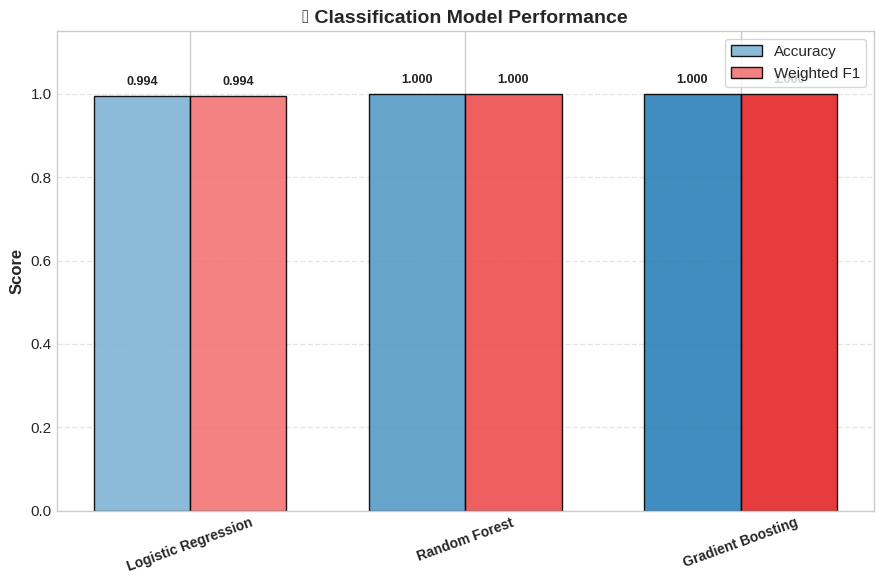

In [40]:
from matplotlib.colors import LinearSegmentedColormap
clf_names = ["Logistic Regression", "Random Forest", "Gradient Boosting"]
acc_vals = [acc_log, acc_rf_clf, acc_gb_clf]
f1_vals = [f1_log, f1_rf_clf, f1_gb_clf]

x_pos = np.arange(len(clf_names))
width = 0.35

# Gradient colors
cmap_acc = LinearSegmentedColormap.from_list("acc_cmap", ["#a6cee3", "#1f78b4"])
cmap_f1 = LinearSegmentedColormap.from_list("f1_cmap", ["#fb9a99", "#e31a1c"])

fig, ax = plt.subplots(figsize=(9, 6))
bars1 = ax.bar(x_pos - width/2, acc_vals, width, label="Accuracy",
               color=cmap_acc(np.linspace(0.3, 0.9, len(acc_vals))),
               edgecolor="black", alpha=0.9)
bars2 = ax.bar(x_pos + width/2, f1_vals, width, label="Weighted F1",
               color=cmap_f1(np.linspace(0.3, 0.9, len(f1_vals))),
               edgecolor="black", alpha=0.9)

# Axes & title
ax.set_xticks(x_pos)
ax.set_xticklabels(clf_names, rotation=20, fontsize=10, fontweight="bold")
ax.set_ylim(0, 1.15)
ax.set_ylabel("Score", fontsize=12, fontweight="bold")
ax.set_title("🔥 Classification Model Performance", fontsize=14, fontweight="bold")
ax.legend(frameon=True)

# Bar labels
for bar_group in [bars1, bars2]:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., height + 0.02,
                f"{height:.3f}", ha="center", va="bottom", fontsize=9, fontweight="bold", color="#222222")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [41]:
if acc_gb_clf >= acc_rf_clf:
    best_clf_name = "Gradient Boosting"
    best_clf_model = gb_clf
else:
    best_clf_name = "Random Forest"
    best_clf_model = rf_clf

print(f"🏆 Best Classification Model: {best_clf_name}")

🏆 Best Classification Model: Gradient Boosting


🔥 Top 10 features for burnout risk prediction:
burnout_risk_score             9.348480e-01
stress_indicator               6.515204e-02
automation_efficiency          2.544822e-15
collaboration_meeting_ratio    1.827318e-15
ai_to_manual_ratio             1.422200e-15
learning_to_work_ratio         5.816501e-16
focus_to_total_ratio           5.371282e-16
workload_intensity             1.653497e-16
error_rate_percent             9.150668e-17
error_complexity_product       7.926644e-18


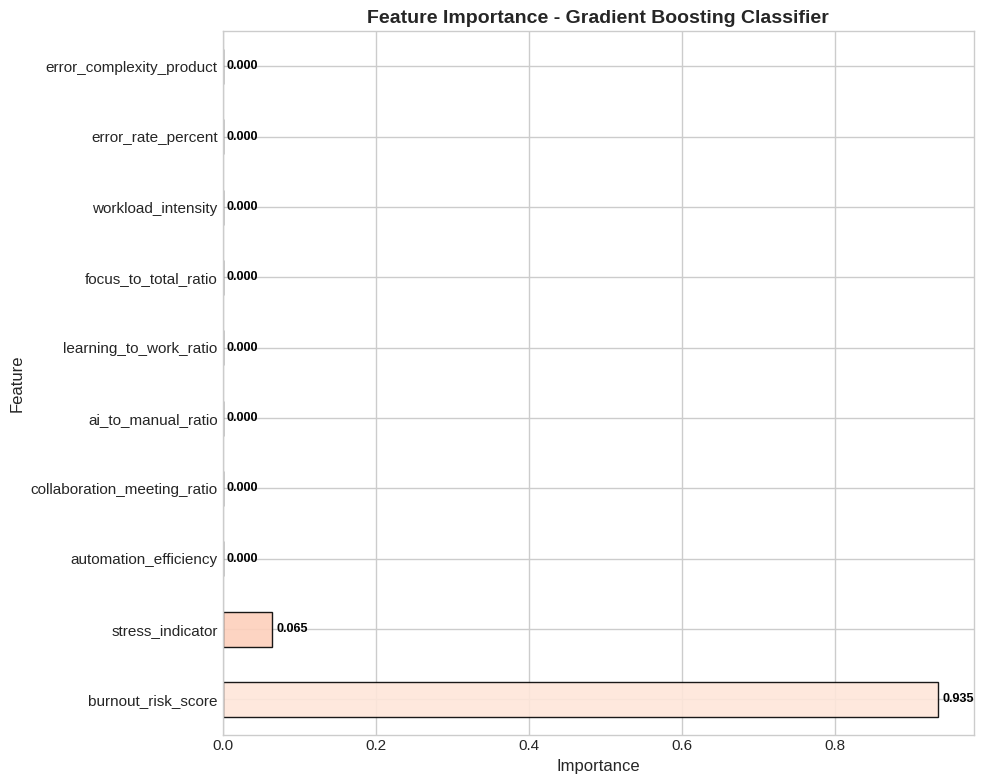

In [42]:
# Sort and get feature importance
feat_imp_clf = pd.Series(best_clf_model.feature_importances_, index=feature_cols).sort_values(ascending=True)

# Top 10 features
top_10 = feat_imp_clf.tail(10).iloc[::-1]
print("🔥 Top 10 features for burnout risk prediction:")
print(top_10.to_string())

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Gradient colors
colors = sns.color_palette("Reds", n_colors=10)
top_10.plot(kind="barh", ax=ax, color=colors, edgecolor="black", alpha=0.9)

# Annotate values
for i, v in enumerate(top_10):
    ax.text(v + 0.005, i, f"{v:.3f}", color='black', va='center', fontweight='bold', fontsize=9)

ax.set_title(f"Feature Importance - {best_clf_name} Classifier", fontsize=14, fontweight="bold")
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")
plt.tight_layout()
plt.show()

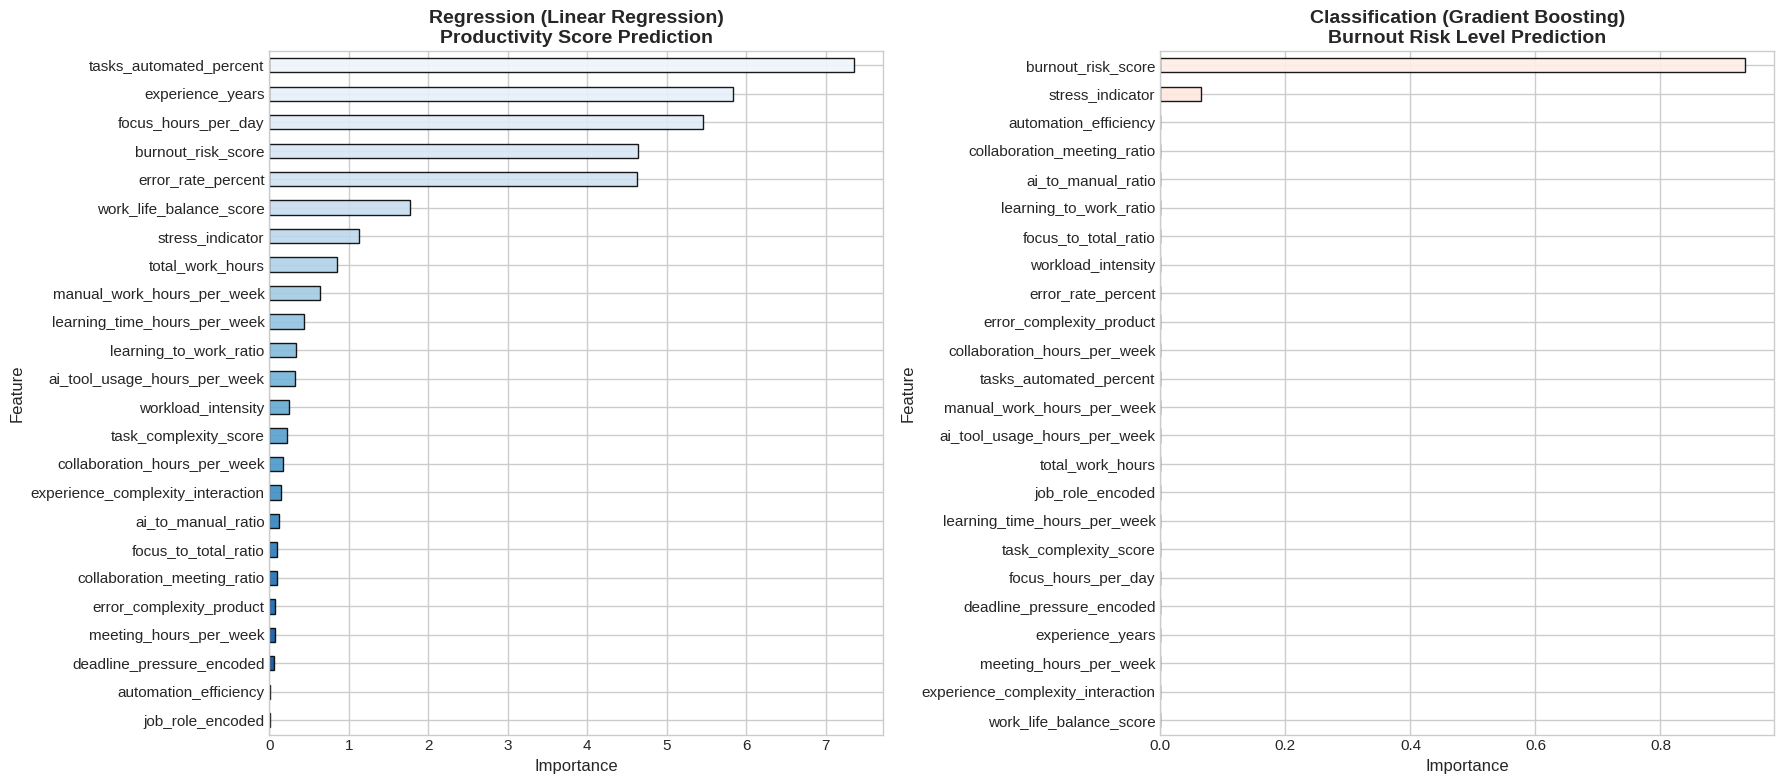

In [43]:
if hasattr(best_reg_model, "feature_importances_"):
    # Tree-based models
    feat_imp_reg = pd.Series(best_reg_model.feature_importances_, index=feature_cols)
else:
    # Linear models
    feat_imp_reg = pd.Series(np.abs(best_reg_model.coef_), index=feature_cols)  # absolute value of coefficients

feat_imp_reg = feat_imp_reg.sort_values(ascending=True)

feat_imp_clf = pd.Series(best_clf_model.feature_importances_, index=feature_cols).sort_values(ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Regression - Gradient Color
colors_reg = sns.color_palette("Blues_r", n_colors=len(feat_imp_reg))
feat_imp_reg.plot(kind="barh", ax=axes[0], color=colors_reg, edgecolor="black", alpha=0.9)
axes[0].set_title(f"Regression ({best_reg_name})\nProductivity Score Prediction", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Importance")
axes[0].set_ylabel("Feature")

# Classification - Gradient Color
colors_clf = sns.color_palette("Reds_r", n_colors=len(feat_imp_clf))
feat_imp_clf.plot(kind="barh", ax=axes[1], color=colors_clf, edgecolor="black", alpha=0.9)
axes[1].set_title(f"Classification ({best_clf_name})\nBurnout Risk Level Prediction", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Importance")
axes[1].set_ylabel("Feature")

plt.tight_layout()
plt.show()

In [44]:
# Select predictions from best regression model
best_reg_preds = gb_reg.predict(X_test) if best_reg_name == "Gradient Boosting" else rf_reg.predict(X_test)

# Create a DataFrame for errors
error_df = X_test.copy()
error_df["actual"] = y_reg_test.values
error_df["predicted"] = best_reg_preds
error_df["residual"] = error_df["actual"] - error_df["predicted"]
error_df["abs_error"] = error_df["residual"].abs()

# Display residual statistics
print("📊 Residual Statistics for Best Regression Model")
print("="*50)
print(error_df["residual"].describe().round(3))
print("\nTop 5 largest errors:")
print(error_df.sort_values("abs_error", ascending=False).head(5)[["actual", "predicted", "residual", "abs_error"]])


📊 Residual Statistics for Best Regression Model
count    900.000
mean       0.006
std        5.857
min      -17.735
25%       -3.948
50%       -0.068
75%        3.770
max       17.469
Name: residual, dtype: float64

Top 5 largest errors:
      actual  predicted   residual  abs_error
542     34.7  52.435216 -17.735216  17.735216
2293    99.8  82.330818  17.469182  17.469182
2600    56.1  38.705253  17.394747  17.394747
3229    76.4  59.283054  17.116946  17.116946
3439    33.5  50.216856 -16.716856  16.716856


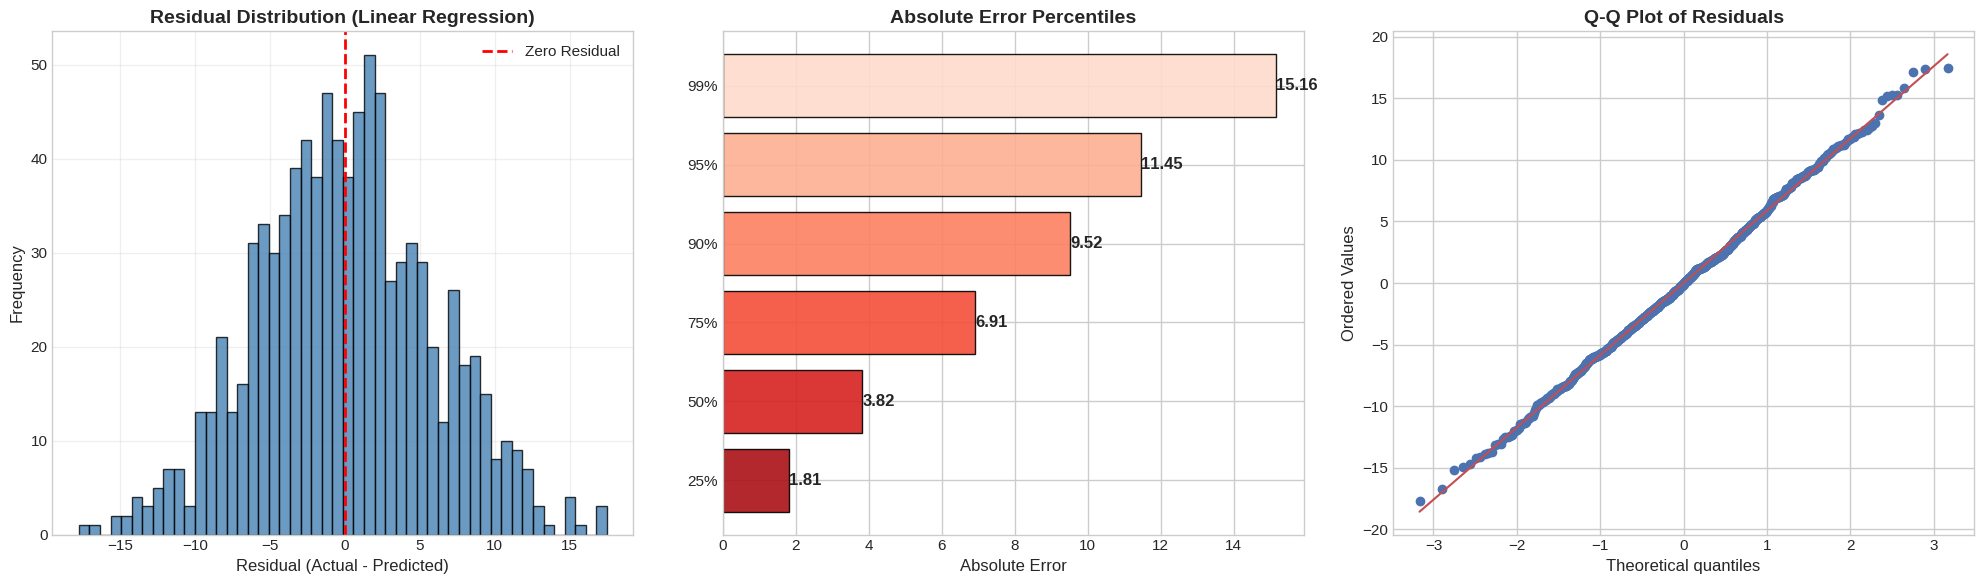

In [45]:
import scipy.stats as stats

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].hist(error_df["residual"], bins=50, color="steelblue", edgecolor="black", alpha=0.8)
axes[0].axvline(0, color="red", linestyle="--", linewidth=2, label="Zero Residual")
axes[0].set_title(f"Residual Distribution ({best_reg_name})", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Residual (Actual - Predicted)")
axes[0].set_ylabel("Frequency")
axes[0].grid(alpha=0.3)
axes[0].legend()

quantiles = error_df["abs_error"].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
colors = sns.color_palette("Reds_r", n_colors=len(quantiles))
axes[1].barh(range(len(quantiles)), quantiles.values, color=colors, edgecolor="black", alpha=0.9)
axes[1].set_yticks(range(len(quantiles)))
axes[1].set_yticklabels([f"{int(q*100)}%" for q in quantiles.index])
axes[1].set_xlabel("Absolute Error")
axes[1].set_title("Absolute Error Percentiles", fontsize=14, fontweight="bold")

# Annotate values
for i, v in enumerate(quantiles.values):
    axes[1].text(v + 0.01, i, f"{v:.2f}", va='center', fontweight="bold")

stats.probplot(error_df["residual"], dist="norm", plot=axes[2])
axes[2].set_title("Q-Q Plot of Residuals", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

In [46]:
print("--- Regression Results (Productivity Score Prediction) ---")
print(f"{'Model':<25} {'RMSE':>8} {'MAE':>8} {'R2':>8}")
print("-" * 55)
print(f"{'Linear Regression':<25} {rmse_lr:>8.4f} {mae_lr:>8.4f} {r2_lr:>8.4f}")
print(f"{'Random Forest':<25} {rmse_rf:>8.4f} {mae_rf:>8.4f} {r2_rf:>8.4f}")
print(f"{'Gradient Boosting':<25} {rmse_gb:>8.4f} {mae_gb:>8.4f} {r2_gb:>8.4f}")

--- Regression Results (Productivity Score Prediction) ---
Model                         RMSE      MAE       R2
-------------------------------------------------------
Linear Regression           5.0719   4.0634   0.8736
Random Forest               5.8536   4.6701   0.8317
Gradient Boosting           5.6938   4.5710   0.8408


In [47]:
print("--- Classification Results (Burnout Risk Level Prediction) ---")
print(f"{'Model':<25} {'Accuracy':>10} {'Weighted F1':>12}")
print("-" * 50)
print(f"{'Logistic Regression':<25} {acc_log:>10.4f} {f1_log:>12.4f}")
print(f"{'Random Forest':<25} {acc_rf_clf:>10.4f} {f1_rf_clf:>12.4f}")
print(f"{'Gradient Boosting':<25} {acc_gb_clf:>10.4f} {f1_gb_clf:>12.4f}")

--- Classification Results (Burnout Risk Level Prediction) ---
Model                       Accuracy  Weighted F1
--------------------------------------------------
Logistic Regression           0.9944       0.9944
Random Forest                 1.0000       1.0000
Gradient Boosting             1.0000       1.0000


In [48]:
reg_top5 = feat_imp_reg.tail(5).index[::-1].tolist()
clf_top5 = feat_imp_clf.tail(5).index[::-1].tolist()
print(f"Top 5 features for Productivity: {reg_top5}")
print(f"\nTop 5 features for Burnout Risk: {clf_top5}")

Top 5 features for Productivity: ['tasks_automated_percent', 'experience_years', 'focus_hours_per_day', 'burnout_risk_score', 'error_rate_percent']

Top 5 features for Burnout Risk: ['burnout_risk_score', 'stress_indicator', 'automation_efficiency', 'collaboration_meeting_ratio', 'ai_to_manual_ratio']


In [49]:
print(f"Dataset size: {len(df)} employees")
print(f"Number of features used: {len(feature_cols)} ({len(feature_cols) - len(engineered_features)} original + {len(engineered_features)} engineered)")

Dataset size: 4500 employees
Number of features used: 24 (14 original + 10 engineered)


In [50]:
avg_prod_by_burnout = df.groupby("burnout_risk_level")["productivity_score"].mean()
print(f"Avg Productivity by Burnout Level:")
for level in ["Low", "Medium", "High"]:
    if level in avg_prod_by_burnout.index:
        print(f"  {level}: {avg_prod_by_burnout[level]:.2f}")

Avg Productivity by Burnout Level:
  Low: 77.93
  Medium: 72.58
  High: 62.00


## Thank you...pls upvote!!!!!!